# Multimimensional Dyck languages

A $k$-dimensional Dyck language, $D_k$, consists of words over a $k$-letter alphabet (with the usual lexicographic ordering) satisfying the following two conditions:

* FREQ: each word contains the $k$ letters with equal frequency
* PREFIX: for every prefix of a word, the number of $a_1 \geq$ the number of $a_2\geq \ldots \geq$ the number of $a_k$

The familiar language of balanced brackets is $D_2$.

For the place of $D_k$ in the extended Chomsky hierarchy, the conjecture is that $D_k$ languages are recognizable by $(k-1)$-MCFG. For example: $D_2$ is recognized by a 1-MCFG, in other words, a simple CFG.

Your challenge is to give a 2-MCFG for $D_3$, and to show it is correct and complete. 

For background, see Moortgat (2014) A note on multidimensional Dyck languages. http://link.springer.com/chapter/10.1007/978-3-642-54789-8_16

Let us start with some helper definitions to generate the Dyck words. In Moortgat (2014) it is shown that the words of $D_k$ can be obtained by repeated shuffling of a deck of $k$ cards (the alphabet symbols). shuffle() is the standard definition for merging two lists in such a way that the order of the elements in the individual lists is respected. dshuffle() is a restricted version that avoids duplicates in case the two decks to be shuffled contain identical cards.

In [1]:
def shuffle(l,r):
    if not (l and r): # left and/or right pack are empty
        return [ l+r ]
    else:
        return [ l[0]+w for w in shuffle(l[1:],r) ] + [ r[0]+w for w in shuffle(l,r[1:]) ] 

def dshuffle(l,r):
    return [ l+r ] if not (l and r) else\
        [ (l,r)[i][0]+w for i in range(2) if not i or r[0]<l[0] for w in dshuffle(l[(i+1)%2:],r[i%2:]) ]

The function dyck(k,n) generates a list with the $k$-dimensional Dyck words with letter frequency $n$. (When you try this out, keep $n$ small: with increasing $n$ the number of words grows very quickly! You'll have to rewrite the code to use generators if you want to work with large $n$.)

In [2]:
def dyck(k,n):
    sigma = ''.join([ chr(97+i) for i in range(k) ])# a,b,c,... (k letters)
    return [ sigma*n ] if n<2 else sum([ dshuffle(sigma,w) for w in dyck(k,n-1) ],[])

In [3]:
len(dyck(3,3))

42

In [4]:
dshuffle('abc','abc')

['abcabc', 'abacbc', 'ababcc', 'aabcbc', 'aabbcc']

## Testing

If you think you have found a 2-MCFG for $D_3$, you can test it with Peter Ljunglöf's MCFG parser.

* Peter Ljunglöf (2012). Practical Parsing of Parallel Multiple Context-Free Grammars. (http://alpage.inria.fr/~clerger/tmpTAG11/cdrom/pdf/TAG+1117.pdf)

* Code available from https://github.com/heatherleaf/MCFParser.py

In [5]:
import sys
import itertools
import re
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

%matplotlib inline

from MCFParser import *


A grammar for the MCFParser is a list of rules. A rule is a 4-tuple:

* a rule identifier (cf the ACG rule constant)
* the left-hand side (lhs) non-terminal
* a list (possibly empty) of rhs non-terminals
* a recipe how to build the string tuple of the lhs non-terminal out of the string tuples of the rhs non-terminals

The recipe is a list of lists. Its length is the dimension of the lhs nonterminal. Variables are pairs (n,m), where n refers to the n-th rhs nonterminal and m to the m-th tuple component of n (counting starts at zero).

The example grammar $\{a^n b^n c^n d^n \mid n >0\}$ in MCFParser format is given below. 

In [6]:
grammar0 = [('r0','S', ['A'], [[(0,0),(0,1)]]),
           ('r1','A',['A'],[['a',(0,0),'b'],['c',(0,1),'d']]),
           ('r2','A',[],[['a','b'],['c','d']])
           ]

p = Parser(grammar0,['S'])

There are two useful methods for testing. chart_parse() returns True/False dependiing on whether a word has a parse. parse() returns a list of abstract syntax trees for a word that is succesfully parsed.

In [7]:
for t in p.parse(list("aaabbbcccddd")):
    print t

('r0', ('r1', ('r1', ('r2',))))


In [8]:
p.chart_parse(list('aaabbbcccdd')) # oops - missing d ..

False

## Your turn

In [9]:
# write your candidate 2-MCFG

# mygrammar = [ ... ]

# tell the parser to use it:

# p = Parser(mygrammar,['S'])

# Below is a simple test function printing out words that your grammar does not recognize.
# Make sure to test also that it doesn't recognize incorrect words!


In [29]:
S, A, a, b, c = 'SAabc'
x, y, z, w = (0,0),(0,1), (1,0),(1,1)
mm0 = [('r{}'.format(i), lhs, rhs, recipe) for i, (lhs, rhs, recipe) in enumerate([
(S, [A], [[x, y]]),
(A,[A],[[x], [y, a, b, c]]),
(A,[A],[[x], [a, y, b, c]]),
(A,[A],[[x], [a, b, y, c]]),
(A,[A],[[x], [a, b, c, y]]),
(A,[A],[[x, y], [a, b, c]]),
(A,[A],[[x, a], [y, b, c]]),
(A,[A],[[x, a], [b, y, c]]),
(A,[A],[[x, a], [b, c, y]]),
(A,[A],[[x, y, a], [b, c]]),
(A,[A],[[x, a, y], [b, c]]),
(A,[A],[[x, a, b], [y, c]]),
(A,[A],[[x, a, b], [c, y]]),
(A,[A],[[x, y, a, b], [c]]),
(A,[A],[[x, a, y, b], [c]]),
(A,[A],[[x, a, b, y], [c]]),
(A,[A],[[x, a, b, c], [y]]),
(A,[A,A],[[a,x,b],[z,c,y,w]]),
(A,[A,A],[[a,x,b],[z,c,w,y]]),
(A,[A,A],[[x,z,a,y,b],[w,c]]),
(A,[A,A],[[x,z,a,w,b],[y,c]]),
(A,[],[[a],[b,c]]),
(A,[],[[a,b],[c]])
])]

p = Parser(mm0,[S])

In [30]:
# print unrecognized words with letter multiplicity n

def d3test(n):
    for w in dyck(3,n):
        if not p.chart_parse(list(w)):
            print w

In [32]:
# everything OK up to n=3 ...

d3test(3)

In [33]:
# grammar mm0 has lots of spurious ambiguity:

for t in p.parse(list("aabbcc")):
    print t

('r0', ('r3', ('r21',)))
('r0', ('r15', ('r21',)))
('r0', ('r11', ('r21',)))
('r0', ('r7', ('r21',)))


In [34]:
# a queue-based machine model
# empty queue: 'Z'
# reading 'a' pushes 'N' in front of queue
# reading 'b': cancels initial 'N' and adds final 'N'
# reading 'c': cancels final 'N'

def d3_queue(w,q='Z',steps=[]): # beginwaarden voor q en steps
    if w=='' and q=='Z':
        return steps+[(w,q)]
    elif w[0]=='a':
        return d3_queue(w[1:],'N'+q,steps+[(w[0],q)])
    elif w[0]=='b' and q[0]=='N':
        return d3_queue(w[1:],q[1:]+'N',steps+[(w[0],q)])
    elif w[0]=='c' and q[-1]=='N':
        return d3_queue(w[1:],q[:-1],steps+[(w[0],q)])
    else:
        return steps+[(w,q)]
    
# acceptance: empty input, empty queue

def d3_accept(w):
    run = d3_queue(w)
    if run[-1]==('','Z'):
        return True
    else: 
        return False

# plotting

def ybar(q):
    return (-len(q[:q.index('Z')]),len(q[q.index('Z')+1:]))

def ybars(d):
    return map(lambda x:ybar(x[1]),d)

def d3_plot(d):
    ind = np.arange(len(d))
    front = tuple(map(lambda x:x[0],ybars(d)))
    back = tuple(map(lambda x:x[1],ybars(d)))
    plt.bar(ind, front, 1.001, color='.65')
    plt.bar(ind, back, 1.001, color='.65')
    plt.xticks(ind+.5, tuple([ item[0] for item in d]) )
    plt.yticks(range(-(len(d)//3),len(d)//3,1))
    plt.axis([0,len(d),-(len(d)//3),len(d)//3])
    return None

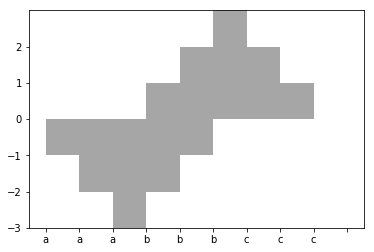

In [35]:
d3_plot(d3_queue("aaabbbccc"))